# Imports

In [1]:
import concurrent.futures 
from time import perf_counter

In [2]:
import pandas as pd
import numpy as np

# Generate data

In [3]:
class MakeData:
    
    def __init__(self,
            data_size: int = 60,                                      # Rows per person in dfbase
            inicial_date: str = "2022-11-05 06:00:00 AM",             # When database begings

            people: list | tuple = ['palomares', 'adrian', 'angel'],  # List of people to generate data for
            food: dict = None
        ):


        self.parameters = [
            'fecha',
            'persona',
            'num. comidas',
            'calorias (kcal)',
            'grasas saturadas (g)',
            'proteinas (g)',
            'sodio (mg)',
            'carbohidratos (g)',
            'fibra (g)',
            'colesterol (mg)'
        ] 

        self.hours = [
            '06:00:00',
            '10:00:00',
            '14:00:00', 
            '18:00:00',
            '22:00:00'                                     
        ]


        self.len_hours = len(self.hours)


        self.food = food if food is not None else {
            "cereal": {"calorias (kcal)": 105, "grasas saturadas (g)": 0.4, "sodio (mg)": 139, "carbohidratos (g)": 21, "fibra (g)": 2.6, "colesterol (mg)": 0, "proteinas (g)": 3.4},                                # Per cup
            "tortilla de maiz": {"calorias (kcal)": 52, "grasas saturadas (g)": 0.1, "sodio (mg)": 11, "carbohidratos (g)": 11, "fibra (g)": 1.5, "colesterol (mg)": 0, "proteinas (g)": 1.4},                        # Per tortilla
            "tortilla de nopal": {"calorias (kcal)": 19, "grasas saturadas (g)": 0, "sodio (mg)": 0, "carbohidratos (g)": 4.7, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 1},                             # Per tortilla
            "palomitas de maiz": {"calorias (kcal)": 31, "grasas saturadas (g)": 0, "sodio (mg)": 1.9, "carbohidratos (g)": 18.6, "fibra (g)": 3.6, "colesterol (mg)": 0, "proteinas (g)": 3},                        # Per cup
            "papa cocida": {"calorias (kcal)": 161, "grasas saturadas (g)": 0.1, "sodio (mg)": 17, "carbohidratos (g)": 37, "fibra (g)": 3.8, "colesterol (mg)": 0, "proteinas (g)": 4.3},                            # Per medium potato
            "camote": {"calorias (kcal)": 103, "grasas saturadas (g)": 0.1, "sodio (mg)": 41, "carbohidratos (g)": 24, "fibra (g)": 3.8, "colesterol (mg)": 0, "proteinas (g)": 2.3},                                 # Per medium sweet potato
            "pan de caja orowheat": {"calorias (kcal)": 90, "grasas saturadas (g)": 0, "sodio (mg)": 135, "carbohidratos (g)": 18, "fibra (g)": 2, "colesterol (mg)": 0, "proteinas (g)": 0},                         # Per slice
            "pan tostado": {"calorias (kcal)": 70, "grasas saturadas (g)": 0.139, "sodio (mg)": 142, "carbohidratos (g)": 13.06, "fibra (g)": 0.6, "colesterol (mg)": 0, "proteinas (g)": 0},                         # Per slice
            "galleta de avena": {"calorias (kcal)": 65, "grasas saturadas (g)": 0.485, "sodio (mg)": 81, "carbohidratos (g)": 10.26, "fibra (g)": 0, "colesterol (mg)": 5, "proteinas (g)": 0.98},                    # Per cookie
            "tostada horneada": {"calorias (kcal)": 70, "grasas saturadas (g)": 0.1234, "sodio (mg)": 0.1234, "carbohidratos (g)": 0.1234, "fibra (g)": 0.1234, "colesterol (mg)": 0.1234, "proteinas (g)": 0.1234},              # Per piece, missing data
            "galletas marias": {"calorias (kcal)": 120, "grasas saturadas (g)": 1.0, "sodio (mg)": 182, "carbohidratos (g)": 23.1, "fibra (g)": 0.6, "colesterol (mg)": 0, "proteinas (g)": 0.1234},                    # Per 5 cookies (30g)
            "galletas habaneras": {"calorias (kcal)": 70, "grasas saturadas (g)": 0.1234, "sodio (mg)": 0.1234, "carbohidratos (g)": 15, "fibra (g)": 0.1234, "colesterol (mg)": 0.1234, "proteinas (g)": 2},                 # Per cookie
            "avena": {"calorias (kcal)": 145, "grasas saturadas (g)": 0.421, "sodio (mg)": 278, "carbohidratos (g)": 25.37, "fibra (g)": 0.1234, "colesterol (mg)": 0, "proteinas (g)": 0.1234},                          # Per cup cooked
            "grano lamixta": {"calorias (kcal)": 120, "grasas saturadas (g)": 0.1234, "sodio (mg)": 0.1234, "carbohidratos (g)": 0.1234, "fibra (g)": 0.1234, "colesterol (mg)": 0.1234, "proteinas (g)": 0.1234},                # Per cup, missing data
            "salmitas": {"calorias (kcal)": 160, "grasas saturadas (g)": 0.1234, "sodio (mg)": 2230, "carbohidratos (g)": 11.8, "fibra (g)": 0.1234, "colesterol (mg)": 0.1234, "proteinas (g)": 2},                        # Per packet
            "arroz": {"calorias (kcal)": 200, "grasas saturadas (g)": 0.1234, "sodio (mg)": 0.1234, "carbohidratos (g)": 36, "fibra (g)": 0.1234, "colesterol (mg)": 0.1234, "proteinas (g)": 3},                             # Per cup cooked
            "yogurt griego": {"calorias (kcal)": 117, "grasas saturadas (g)": 5.716, "sodio (mg)": 55, "carbohidratos (g)": 5.04, "fibra (g)": 0, "colesterol (mg)": 35, "proteinas (g)": 0},                         # per 100g
            "frijoles molidos": {"calorias (kcal)": 367, "grasas saturadas (g)": 3.512, "sodio (mg)": 711, "carbohidratos (g)": 47.64, "fibra (g)": 0, "colesterol (mg)": 15, "proteinas (g)": 0},                    # Per cup
            "habas": {"calorias (kcal)": 62, "grasas saturadas (g)": 0.05, "sodio (mg)": 0, "carbohidratos (g)": 10.1, "fibra (g)": 3.6, "colesterol (mg)": 0, "proteinas (g)": 4.8},                                 # Per cup
            "pechuga de pollo": {"calorias (kcal)": 165, "grasas saturadas (g)": 1, "sodio (mg)": 74, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 85, "proteinas (g)": 31},                            # per 100g
            "clara de huevo": {"calorias (kcal)": 17, "grasas saturadas (g)": 0, "sodio (mg)": 55, "carbohidratos (g)": 0.24, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 0},                              # Per egg white
            "sobre de atun": {"calorias (kcal)": 108, "grasas saturadas (g)": 0.235, "sodio (mg)": 37, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 45, "proteinas (g)": 0},                            # per 100g
            "pechuga de pavo": {"calorias (kcal)": 104, "grasas saturadas (g)": 0.48, "sodio (mg)": 2540, "carbohidratos (g)": 4.21, "fibra (g)": 0.5, "colesterol (mg)": 0, "proteinas (g)": 17.07},                 # per 100g
            "salmon ahumado": {"calorias (kcal)": 117, "grasas saturadas (g)": 0.929, "sodio (mg)": 1960, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 23, "proteinas (g)": 18.28},                     # per 100g
            "pescado": {"calorias (kcal)": 84, "grasas saturadas (g)": 0, "sodio (mg)": 0, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 0},                                         # per 100g
            "queso panela light": {"calorias (kcal)": 210, "grasas saturadas (g)": 1, "sodio (mg)": 548, "carbohidratos (g)": 4, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 17},                          # per 100g
            "bistec de bola cortemagro": {"calorias (kcal)": 252, "grasas saturadas (g)": 0, "sodio (mg)": 0, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 0},                      # per 100g
            "huevo": {"calorias (kcal)": 74, "grasas saturadas (g)": 0, "sodio (mg)": 0, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 0},                                           # Per large egg
            "carne molida de sirloin": {"calorias (kcal)": 276, "grasas saturadas (g)": 7.192, "sodio (mg)": 400, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 88, "proteinas (g)": 25.35},             # per 100g
            "filete de res": {"calorias (kcal)": 252, "grasas saturadas (g)": 5.877, "sodio (mg)": 373, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 82, "proteinas (g)": 0},                           # per 100g
            "filete de arrachera": {"calorias (kcal)": 253, "grasas saturadas (g)": 6, "sodio (mg)": 63, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 29},                          # per 100g
            "aguacate (con aceite de coco)": {"calorias (kcal)": 200, "grasas saturadas (g)": 14.7 + 4.5, "sodio (mg)": 0, "carbohidratos (g)": 8.5, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 2},       # per 100g linea 82
            "nueces": {"calorias (kcal)": 654, "grasas saturadas (g)": 6.126, "sodio (mg)": 2, "carbohidratos (g)": 13.71, "fibra (g)": 6.7, "colesterol (mg)": 0, "proteinas (g)": 0},                               # per 100g
            "almendras": {"calorias (kcal)": 578, "grasas saturadas (g)": 3.881, "sodio (mg)": 1, "carbohidratos (g)": 19.74, "fibra (g)": 11.8, "colesterol (mg)": 0, "proteinas (g)": 0},                           # per 100g
            "aceite de aguacate": {"calorias (kcal)": 884, "grasas saturadas (g)": 0, "sodio (mg)": 0, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 0},                             # per 100g
            "aceite de oliva": {"calorias (kcal)": 884, "grasas saturadas (g)": 13.808, "sodio (mg)": 0, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 0},                           # per 100g
            "mantequilla de maní": {"calorias (kcal)": 588, "grasas saturadas (g)": 10.292, "sodio (mg)": 459, "carbohidratos (g)": 19.56, "fibra (g)": 6, "colesterol (mg)": 0, "proteinas (g)": 25.09},             # per 100g
            "Melon": {"calorias (kcal)": 34, "grasas saturadas (g)": 0.19, "sodio (mg)": 1, "carbohidratos (g)": 8.16, "fibra (g)": 0.1234, "colesterol (mg)": 0.1234, "proteinas (g)": 0.84},                            # per 100g
            "Platano": {"calorias (kcal)": 80, "grasas saturadas (g)": 0.2, "sodio (mg)": 1, "carbohidratos (g)": 18.5, "fibra (g)": 0.1234, "colesterol (mg)": 0.1234, "proteinas (g)": 1.2},                            # per 100g
            "Manzana": {"calorias (kcal)": 52, "grasas saturadas (g)": 0.17, "sodio (mg)": 1, "carbohidratos (g)": 13.81, "fibra (g)": 2.4, "colesterol (mg)": 0.1234, "proteinas (g)": 0.26},                          # per 100g
            "Chapata": {"calorias (kcal)": 344, "grasas saturadas (g)": 0.1234, "sodio (mg)": 0.1234, "carbohidratos (g)": 69, "fibra (g)": 0.1234, "colesterol (mg)": 0.1234, "proteinas (g)": 8},                           # per 100g (estimado a partir de 300g)
            "Salmon": {"calorias (kcal)": 146, "grasas saturadas (g)": 1.26, "sodio (mg)": 46, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 45, "proteinas (g)": 21.62},                                # per 100g
            "Pasta": {"calorias (kcal)": 220, "grasas saturadas (g)": 0.1234, "sodio (mg)": 0.1234, "carbohidratos (g)": 0.1234, "fibra (g)": 0.1234, "colesterol (mg)": 0.1234, "proteinas (g)": 0.1234},                        # per 100g
            "Frituras": {'calorias (kcal)': 536, 'grasas saturadas (g)': 7.1, 'sodio (mg)': 730, 'carbohidratos (g)': 52, 'fibra (g)': 4.4, 'colesterol (mg)': 0, 'proteinas (g)': 7.6},                              # Per 100g
            "Tacos": {'calorias (kcal)': 150, 'grasas saturadas (g)': 3.1, 'sodio (mg)': 490, 'carbohidratos (g)': 15, 'fibra (g)': 2.9, 'colesterol (mg)': 25, 'proteinas (g)': 9},                                  # Per taco
            "Motuleños": {'calorias (kcal)': 400, 'grasas saturadas (g)': 5.8, 'sodio (mg)': 870, 'carbohidratos (g)': 45, 'fibra (g)': 3.5, 'colesterol (mg)': 185, 'proteinas (g)': 20},                            # Per plate
            "Uvas": {'calorias (kcal)': 69, 'grasas saturadas (g)': 0.1, 'sodio (mg)': 2, 'carbohidratos (g)': 18, 'fibra (g)': 0.9, 'colesterol (mg)': 0, 'proteinas (g)': 0.7},                                     # Per 100g
            "Pure": {'calorias (kcal)': 85, 'grasas saturadas (g)': 0.2, 'sodio (mg)': 297, 'carbohidratos (g)': 20, 'fibra (g)': 2, 'colesterol (mg)': 0, 'proteinas (g)': 1.7},                                     # Per 100g
            "Tacos de salmon": {'calorias (kcal)': 200, 'grasas saturadas (g)': 2.5, 'sodio (mg)': 310, 'carbohidratos (g)': 20, 'fibra (g)': 1.5, 'colesterol (mg)': 40, 'proteinas (g)': 12},                       # Per taco
            "Café": {"calorias (kcal)": 2.4, "grasas saturadas (g)": 0, "sodio (mg)": 0, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 0.3},                                         # Per cup
            "Chocolate": {"calorias (kcal)": 505, "grasas saturadas (g)": 55, "sodio (mg)": 0, "carbohidratos (g)": 42, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 3},                                    # Per 100g
            "Snacks": {"calorias (kcal)": 388, "grasas saturadas (g)": 12, "sodio (mg)": 2200, "carbohidratos (g)": 10, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 15},                                   # Per 100g
            "Pizza": {"calorias (kcal)": 285, "grasas saturadas (g)": 10.4, "sodio (mg)": 640, "carbohidratos (g)": 35.6, "fibra (g)": 2.5, "colesterol (mg)": 0, "proteinas (g)": 12.2},                             # Per slice
            "sabritas": {"calorias (kcal)": 536, "grasas saturadas (g)": 0, "sodio (mg)": 0, "carbohidratos (g)": 0, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 0},                                       # Per 100g
            "fuzetea": {"calorias (kcal)": 158, "grasas saturadas (g)": 0, "sodio (mg)": 54, "carbohidratos (g)": 39, "fibra (g)": 0, "colesterol (mg)": 0, "proteinas (g)": 0}                                       # Per 600ml
        }


        # La información se basa en porciones de 100 g para todos los alimentos, excepto para el huevo, que es por huevo grande
        # Para algunos alimentos, no se encontró información completa para todos los nutrientes (como fibra (g) y colesterol (mg)), por lo que se ha dejado como None.
        # La información de la "Chapata" se estimó para 100g basándose en la información de una pieza de 300g.

        while data_size % self.len_hours != 0: data_size += 1

        self.serving_limit = 5             # Max num of servings that is tabulated on df parameters
        self.z = 7                          # Pareto distribution parameter

        self.people = people
        self.data_size = data_size
        self.inicial_date = inicial_date

        self.food_list = list(self.food)          
        self.parameters_values = [np.nan for _ in self.parameters]

        self.parameters_df = []
        for parameter in self.parameters[3:]:
            self.parameters_df.append(pd.DataFrame({key: [value[parameter] * i for i in range(self.serving_limit)] for key, value in self.food.items()}))


    def generate(self, distribution: str = "distrbution_pareto_ll") -> pd.DataFrame:
        time1 = perf_counter()
        frames = []

        with concurrent.futures.ThreadPoolExecutor() as excutor:
            all_df = [excutor.submit(self.generate_data, person, distribution) for person in self.people]

            for t in concurrent.futures.as_completed(all_df):
                frames += [t.result()]


        print(f"\nTotal: {perf_counter() - time1:4,.4f} seconds\n")

        return pd.concat(frames, ignore_index=True)
    
    def generate_data(self, person, distribution) -> pd.DataFrame:
        print(f"making data up for {person:>10}  ")
        
        # For filling in the calorie content for the newly added self.foods, I will use standard calorie values from reliable sources.
        # These are approximate values and may vary based on specific self.food varieties and preparation methods.
        amount_food = [self.distribution_pareto_ll() for _ in self.food_list]
        df = pd.DataFrame({key: value for key, value in zip(self.parameters + self.food_list, self.parameters_values + amount_food)})

        for i, key in enumerate(self.parameters):
            time4 = perf_counter()

            if i == 0: df[key] = self.generate_dates()
            if i == 1: df[key] = np.array([person for _ in range(self.data_size)])
            if i == 2: df[key] = df[self.food_list].sum(axis=1, numeric_only=True)
            if i >= 3: df[key] = self.index(df, self.parameters_df[i - 3]) 

            hey = perf_counter() - time4

            if not hey < 0.1:
                print(f"{person:10} {i:2d} executed in {hey:3,.3f} seconds")

        return df


    def index(self, df_1: pd.DataFrame, df_2: pd.DataFrame) -> np.array:
        values = np.array([], dtype=np.int64)
        first_element = df_1.columns.get_loc(list(self.food)[0])

        for row in range(self.data_size):
            suma = np.int64(0)

            for col in range(len(self.food)):
                suma += df_2.iloc[df_1.iloc[row][col + first_element]][col]

            values = np.append(values, suma)

        return values

    
    def generate_dates(self):
        nonsensehours = [num + i for i, num in enumerate(list(range(self.len_hours, self.data_size, self.len_hours))) if num + i < self.data_size]
        dates = pd.date_range(self.inicial_date, periods=self.data_size + len(nonsensehours), freq=f'{self.len_hours - 1}H')

        return dates.delete(nonsensehours)

    

    def save(self, name: str = "DataFrame") -> None:
        try:
            self.to_excel(f"{name}.xlsx", sheet_name="Data", index=False)
        except AttributeError:
            self.generate().to_excel(f"{name}.xlsx", sheet_name="Data", index=False)

    def read(self, name: str = "DataFrame") -> pd.DataFrame:
        return pd.read_excel(f"{name}.xlsx", sheet_name="Data")


    def distribution_pareto_ll(self, W: float = 3.):
        time10 = perf_counter()

        # change for a better distribution later -----------------
        k = [self.serving_limit]
        limit = (k[0] - 1)

        while max(k) > limit:
            k = np.int64(np.random.default_rng().pareto(W, self.data_size))

        time11 = perf_counter() - time10

        if time11 > 0.5:
            print(f"pareto_ll executed in {time11:3,.3f} seconds")
            
        return k


# Analisis

In [4]:
from matplotlib import gridspec, pyplot as plt
from matplotlib.widgets import Slider, CheckButtons

import seaborn as sns

In [5]:
parameters = [
            'fecha',
            'persona',
            'num. comidas',
            'calorias (kcal)',
            'grasas saturadas (g)',
            'proteinas (g)',
            'sodio (mg)',
            'carbohidratos (g)',
            'fibra (g)',
            'colesterol (mg)'
        ] 

In [6]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [7]:
data = MakeData(data_size=365).generate()

making data up for  palomares  
making data up for     adrian  
making data up for      angel  
palomares   2 executed in 0.125 seconds
angel       3 executed in 9.048 seconds
adrian      3 executed in 9.487 seconds
palomares   3 executed in 10.595 seconds
angel       4 executed in 9.997 seconds
adrian      4 executed in 10.592 seconds
palomares   4 executed in 10.095 seconds
angel       5 executed in 12.137 seconds
adrian      5 executed in 13.344 seconds
palomares   5 executed in 13.037 seconds
angel       6 executed in 8.157 seconds
adrian      6 executed in 7.800 seconds
palomares   6 executed in 8.020 seconds
angel       7 executed in 6.990 seconds
adrian      7 executed in 7.136 seconds
palomares   7 executed in 7.212 seconds
angel       8 executed in 6.592 seconds
palomares   8 executed in 6.533 seconds
adrian      8 executed in 8.521 seconds
angel       9 executed in 6.613 seconds
adrian      9 executed in 5.294 seconds
palomares   9 executed in 5.634 seconds

Total: 62.6387 se

In [8]:
data[parameters].describe()

,num. comidas,calorias (kcal),grasas saturadas (g),proteinas (g),sodio (mg),carbohidratos (g),fibra (g),colesterol (mg)
count,1095.00,1095.00,1095.00,1095.00,1095.00,1095.00,1095.00,1095.00
mean,9.14,2038.59,31.56,51.70,2689.87,133.62,11.54,111.33
std,3.92,1166.89,33.90,39.78,2509.38,83.15,9.92,135.90
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,6.00,1165.00,10.34,22.14,768.06,74.65,4.37,5.56
50%,9.00,1841.00,21.54,43.28,2051.12,121.25,9.32,70.00
75%,12.00,2698.50,42.29,73.99,3837.06,182.12,16.42,164.25
max,25.00,7262.00,264.67,242.47,18162.00,491.80,65.75,960.25


In [9]:
data.head()

,fecha,persona,num. comidas,calorias (kcal),grasas saturadas (g),proteinas (g),sodio (mg),carbohidratos (g),fibra (g),colesterol (mg),...,Motuleños,Uvas,Pure,Tacos de salmon,Café,Chocolate,Snacks,Pizza,sabritas,fuzetea
0,2022-11-05 06:00:00,angel,9,1550.00,34.84,135.96,895.12,92.51,9.52,0.25,...,0,1,0,0,0,0,0,1,0,0
1,2022-11-05 10:00:00,angel,14,3513.00,57.77,27.22,5379.00,259.47,19.39,0.37,...,0,1,0,0,0,1,0,0,0,0
2,2022-11-05 14:00:00,angel,19,7262.00,97.69,89.84,3852.25,251.37,65.75,488.25,...,0,0,0,4,0,0,0,1,0,0
3,2022-11-05 18:00:00,angel,8,2142.00,22.95,65.48,4078.00,94.14,1.62,78.12,...,0,0,0,1,0,0,0,0,0,0
4,2022-11-05 22:00:00,angel,7,2599.00,17.93,0.00,2900.00,210.54,11.80,60.00,...,0,0,0,0,0,0,0,0,1,0


In [10]:
corrmat = data[parameters].corr(numeric_only=True)

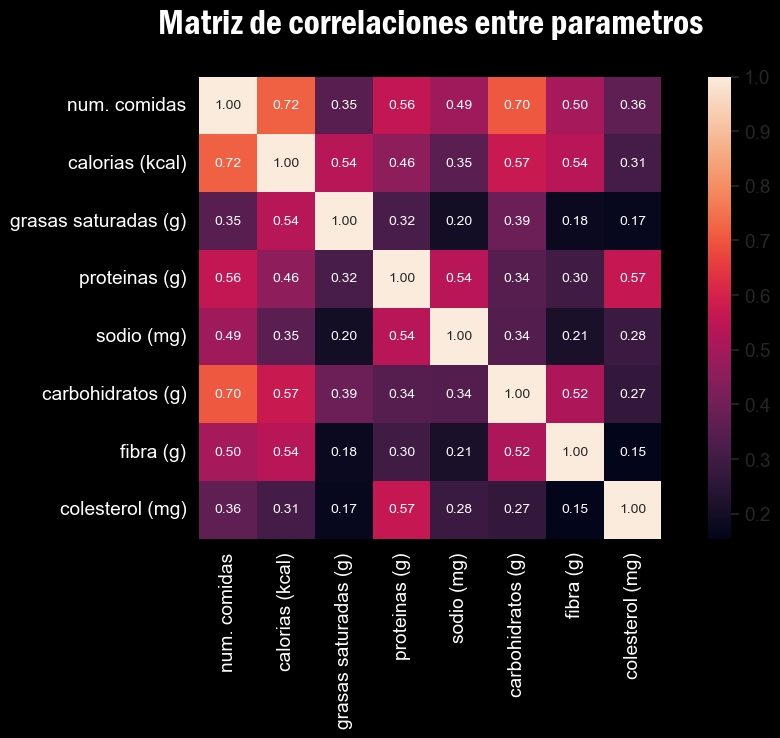

In [46]:
# heatmap of parameters correlations to each other


plt.style.use('dark_background')
plt.subplots(figsize=(12, 6))
sns.set(font_scale = 1.25)
sns.heatmap(corrmat,square=True, cbar=True,annot=True, fmt='.2f',annot_kws={"size":10})

plt.title("Matriz de correlaciones entre parametros\n", fontdict={"name": "franklin gothic demi cond", "size": 25})
plt.show()

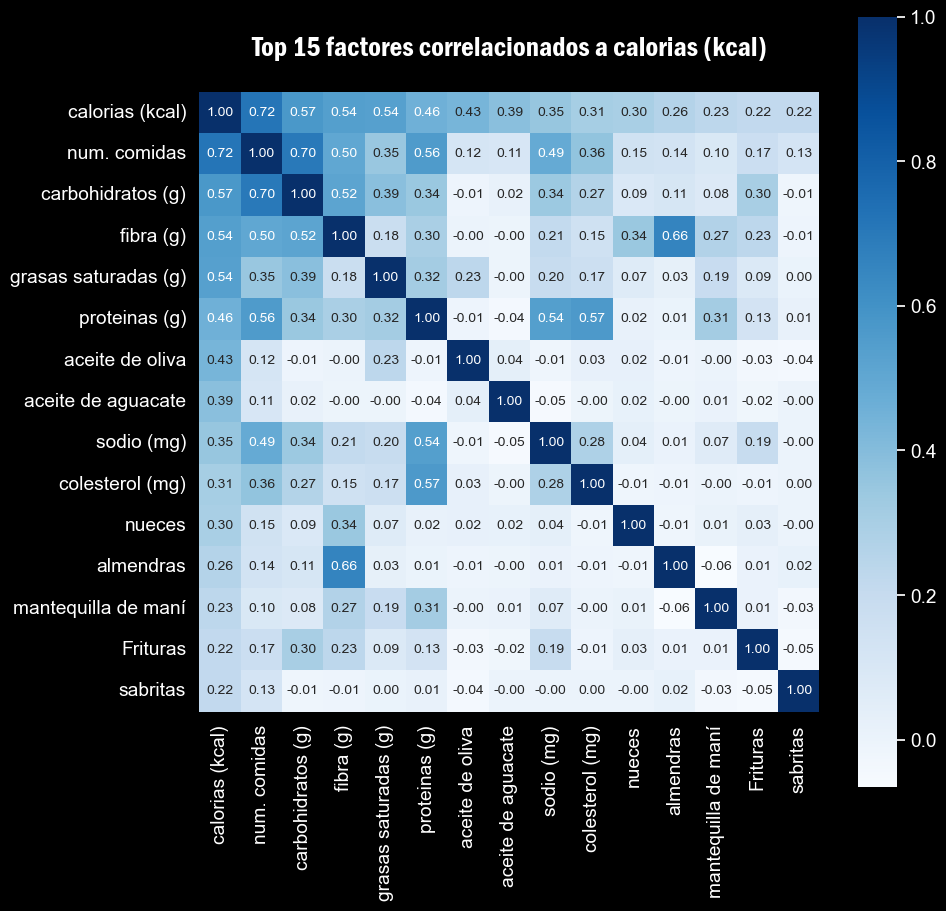

In [32]:
# heatmap of top k factors correlations to l

l = parameters[3]   # parameter to correlate to

k = 15              # top k factors
a =  b = 10         # size of heatmap

ala = data.corr(numeric_only=True).nlargest(k, l)[l].index
cm = np.corrcoef(data[ala].values.T)

sns.set(font_scale = 1.25)
plt.style.use('dark_background')
plt.subplots(figsize=(a, b))
plt.title(
    f"Top {k} factores correlacionados a {l}\n",
    fontdict={"name": "franklin gothic demi cond", "size": 20, "weight": "bold"},
)

sns.heatmap(cm, cbar=True, square=True, annot=True,cmap="Blues", fmt='.2f',annot_kws={"size":10}, yticklabels=ala.values, xticklabels=ala.values)
plt.show()

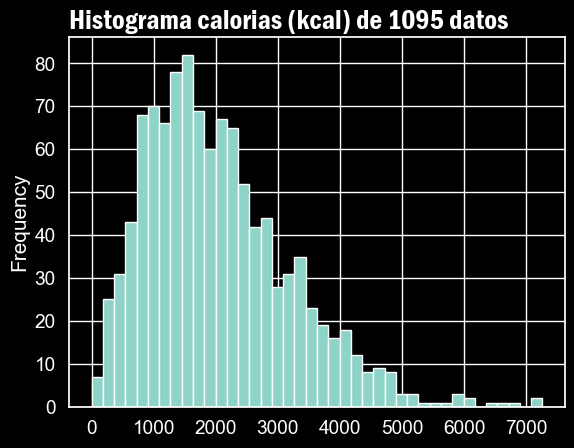

In [41]:
parameter = 3     # parameter to plot


# 2 for num. comidas, 9 for colesterol (mg)
# 31 for num. comidas, 35 for colesterol (mg), 40 for the rest
if parameter == 2: bins = 23
elif parameter == 9: bins = 30
else: bins = 40

plt.style.use('dark_background')
plt.hist(data[parameters[parameter]], bins=bins)
plt.title(
    f'Histograma {parameters[parameter]} de {len(data[parameters[parameter]])} datos',
    fontdict={
        "name": 'franklin gothic demi cond', 
        "size": 20, 
        "weight": 'bold',
    },
    loc='left'
)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

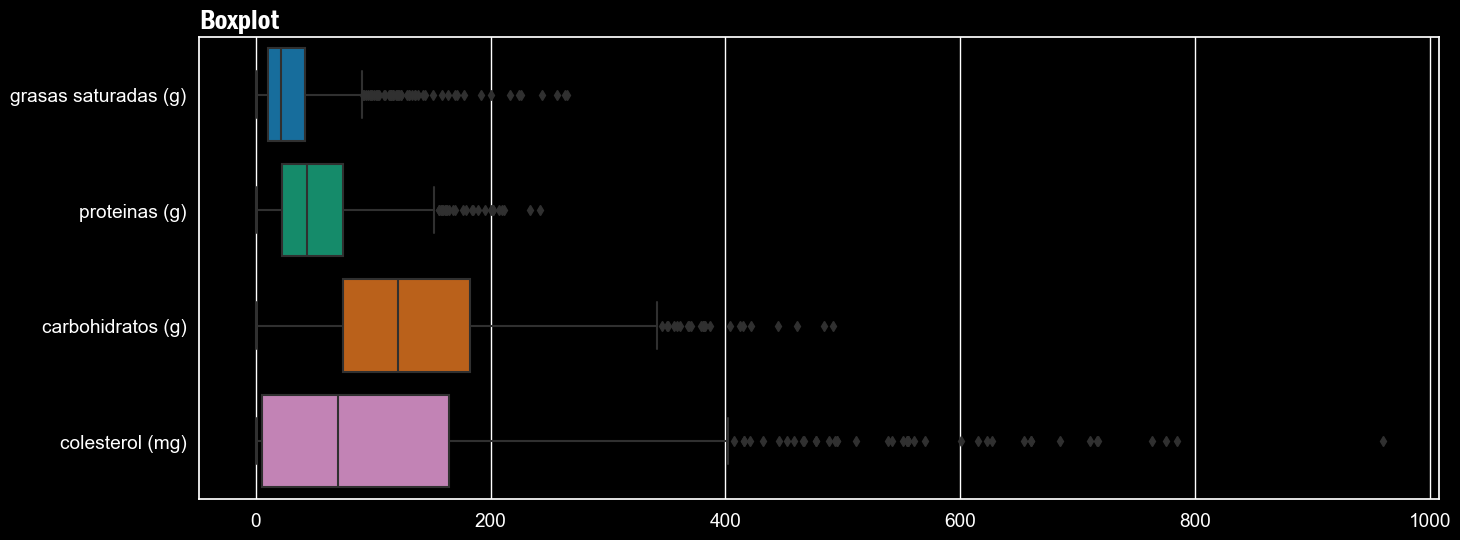

In [47]:
s = 2     # set of parameters to plot (becouse of the mesures of the parameters, some of them are grouped together)
a = 16    # size of the plot
b = 6     # size of the plot

if s == 1: s = parameters[3:7:3] 
if s == 2: s = parameters[4:6] + parameters[7:8] + parameters[9:10]
if s == 3: s = parameters[2:3] + parameters[8:9]

plt.style.use('dark_background')
f, ax = plt.subplots(figsize=(a, b))
fig = sns.boxplot(data = data[s], orient="h", palette="colorblind6")

plt.title(
    "Boxplot",
    fontdict={
        "name": 'franklin gothic demi cond', 
        "size": 20, 
        "weight": 'bold',
    },
    loc='left'
)
plt.show()

In [118]:
def plot_date(
    df: pd.DataFrame = data,                                        # Dataframe to plot
    plot: str = "line",                                             # Type of plot

    # style
    gridlines: bool = True,                                         # Grid on the plot
    style: plt.style.available = 'dark_background',                 # Style of the plot

    # filters
    name: int = 0,                                                  # Name of the person to plot base on the list of people
    parameter: int = 3,                                             # Parameter to plot base on the list of parameters
    limit: int = 100_000_000,                                       # Limit of the data to plot
    a: int = 16,                                                    # "y" axis Size of the plot
    b: int = 6,                                                     # "x" axis Size of the plot

    # boxplot
    s = 2,     # set of parameters to plot (becouse of the mesures of the parameters, some of them are grouped together)

    # lineplot
    min_date: str = "2022-11-05",                                   # Min date to plot
    max_date: str = "2023-11-05",                                   # Max date to plot
    

    # scatterplot

    # histogram

    # variables
    people: list | tuple = ['palomares', 'adrian', 'angel'],        # List of people to generate data for
    parameters: tuple | list = [                                    # Parameters to plot
                'fecha',
                'persona',
                'num. comidas',
                'calorias (kcal)',
                'grasas saturadas (g)',
                'proteinas (g)',
                'sodio (mg)',
                'carbohidratos (g)',
                'fibra (g)',
                'colesterol (mg)'
            ]
    ) -> None:
        # function to plot data from the dataframe apllying filters and style



    # filters__________________________________________________________

    filt = df.loc[(df[parameters[0]] >= pd.to_datetime(min_date)) & (df[parameters[0]] < pd.to_datetime(max_date))]
    filt = filt.loc[filt[parameters[1]] == people[name]]
    filt = filt[parameters[0:(parameter + 1):parameter]][:limit]


    
    if plot.lower() == "line":
        plt.subplots(figsize=(a, b))

        plt.plot(filt[parameters[0]], filt[parameters[parameter]], marker='o', linestyle='--', color='r', label='Square')

        plt.title(
            f"{parameters[parameter]} vs {parameters[0]}",
            fontdict={
                "name": 'franklin gothic demi cond', 
                "size": 20, 
                "weight": 'bold',
            },
        )
        plt.style.use(style)
        plt.grid(gridlines)


    if plot.lower() == "scatter":
        # scatter plot for lineal regresion

        correlation_line = [i for i in range(0, 7001,( 7001//365))]  # sample, not real regression yet

        while len(correlation_line) > 365:
            correlation_line.remove(correlation_line[-1])


        plt.subplots(figsize=(a, b))
        plt.scatter(filt[parameters[0]], filt[parameters[parameter]], color='r', label='Square')
        plt.plot(filt[parameters[0]], correlation_line, color='red', linewidth=1)

        plt.title(
            f"{parameters[parameter]} vs {parameters[0]}",
            fontdict={
                "name": 'franklin gothic demi cond', 
                "size": 20, 
                "weight": 'bold',
            },
        )
        plt.style.use(style)
        plt.grid(gridlines)
 

    if plot.lower() == "box":
        if s == 1: s = parameters[3:7:3] 
        if s == 2: s = parameters[4:6] + parameters[7:8] + parameters[9:10]
        if s == 3: s = parameters[2:3] + parameters[8:9]

        plt.subplots(figsize=(a, b))
        sns.boxplot(filt = data[s], orient="h", palette="colorblind6")

        plt.title(
            "Boxplot",
            fontdict={
                "name": 'franklin gothic demi cond', 
                "size": 20, 
                "weight": 'bold',
            },
            loc='left'
        )
        plt.style.use(style)
        plt.grid(gridlines)
    
    if plot.lower() == "hist":
        # 2 for num. comidas, 9 for colesterol (mg)
        # 31 for num. comidas, 35 for colesterol (mg), 40 for the rest
        if parameter == 2: bins = 23
        elif parameter == 9: bins = 30
        else: bins = 40


        plt.hist(filt[parameters[parameter]], bins=bins)
        plt.title(
            f'Histograma {parameters[parameter]} de {len(filt[parameters[parameter]])} datos',
            fontdict={
                "name": 'franklin gothic demi cond', 
                "size": 20, 
                "weight": 'bold',
            },
            loc='left'
        )
        plt.ylabel('Frequency')

        plt.style.use(style)
        plt.grid(gridlines)

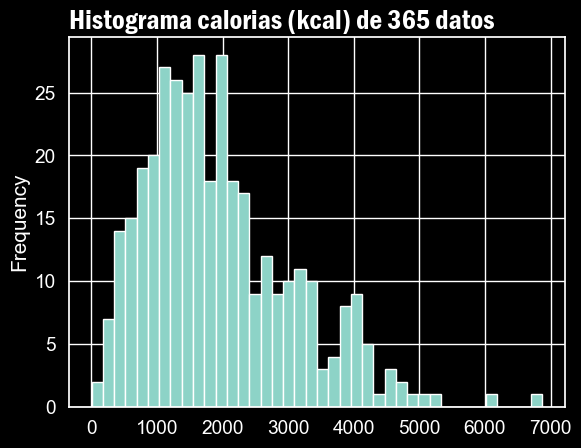

In [124]:
plot_date(
    plot="hist",      # Type of plot (line, scatter (not ready yet), box, hist)

    # filters
    s=2,             # set of parameters to plot (for box plot)
    name=0,          # Name of the person to plot base on the list of people
    parameter=3,     # Parameter to plot base on the list of parameters
    limit=8000000,   # Limit of the data to plot
    gridlines=True,

    a=16,            # "x" axis Size of the plot
    b=6,             # "y" axis Size of the plot


    people=['palomares', 'adrian', 'angel'],
    parameters=[
                'fecha',
                'persona',
                'num. comidas',
                'calorias (kcal)',
                'grasas saturadas (g)',
                'proteinas (g)',
                'sodio (mg)',
                'carbohidratos (g)',
                'fibra (g)',
                'colesterol (mg)'
            ]
)